<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Hands-on Lab : Web Scraping**


Estimated time needed: **30 to 45** minutes


## Objectives


In this lab you will perform the following:


* Extract information from a given web site 
* Write the scraped data into a csv file.


## Extract information from the given web site
You will extract the data from the below web site: <br> 


In [1]:
#this url contains the data you need to scrape
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

The data you need to scrape is the **name of the programming language** and **average annual salary**.<br> It is a good idea to open the url in your web broswer and study the contents of the web page before you start to scrape.


Import the required libraries


In [2]:
# Your code here
import requests

Download the webpage at the url


In [3]:
#your code goes here
data = requests.get(url).text

Create a soup object


In [5]:
from bs4 import BeautifulSoup
!pip3 install html5lib
soup = BeautifulSoup(data,'html.parser')

Scrape the `Language name` and `annual average salary`.


In [6]:
#your code goes here
import pandas as pd
table = soup.find('table')
df = pd.read_html(str(table), flavor='bs4')[0]
headers = df.iloc[0]
df = pd.DataFrame(df.values[1:], columns=headers)
df.head()

,No.,Language,Created By,Average Annual Salary,Learning Difficulty
0,1,Python,Guido van Rossum,"$114,383",Easy
1,2,Java,James Gosling,"$101,013",Easy
2,3,R,"Robert Gentleman, Ross Ihaka","$92,037",Hard
3,4,Javascript,Netscape,"$110,981",Easy
4,5,Swift,Apple,"$130,801",Easy


In [7]:
df['Average Annual Salary'] = df['Average Annual Salary'].str.replace('$','').str.replace(',','')
df['Average Annual Salary'] = pd.to_numeric(df['Average Annual Salary'])
df2 = df.sort_values(by=['Average Annual Salary'],ascending=False)
df2.head()

/home/jupyterlab/conda/envs/python/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.


,No.,Language,Created By,Average Annual Salary,Learning Difficulty
4,5,Swift,Apple,130801,Easy
0,1,Python,Guido van Rossum,114383,Easy
5,6,C++,Bjarne Stroustrup,113865,Hard
3,4,Javascript,Netscape,110981,Easy
1,2,Java,James Gosling,101013,Easy


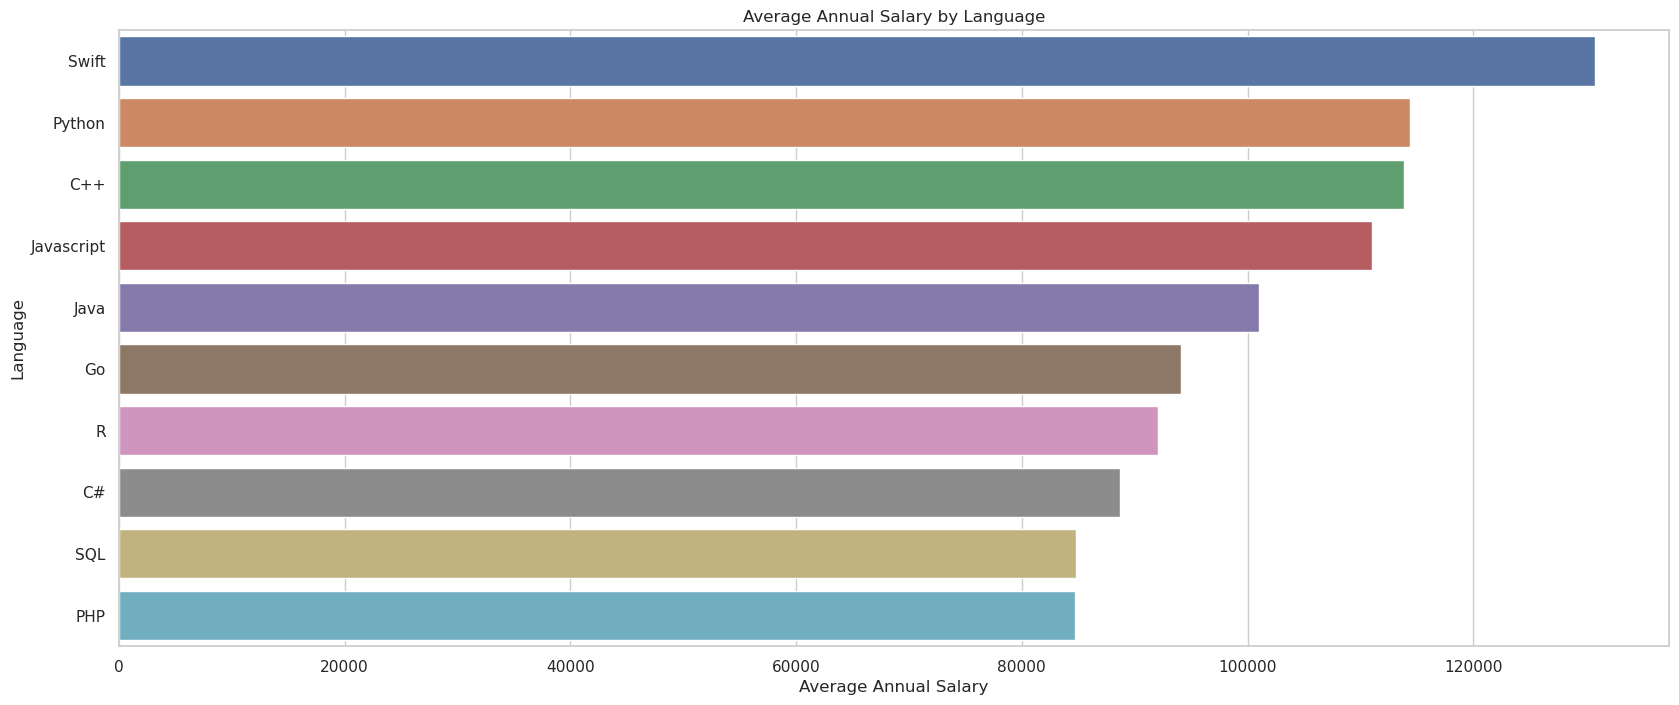

In [12]:
# Draw the chart
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(style='whitegrid')
f, ax = plt.subplots(figsize=(20, 8))
sns.barplot(x='Average Annual Salary', y='Language', data=df2)
plt.title('Average Annual Salary by Language')
plt.show()

In [ ]:
Save the scrapped data into a file named *popular-languages.csv*


In [13]:
# your code goes here
df.to_csv('popular-Languages.csv')

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


## Change Log


|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2020-10-17  | 0.1  | Ramesh Sannareddy  |  Created initial version of the lab |


 Copyright &copy; 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDA0321ENSkillsNetwork928-2022-01-01).
